# Simple keywords cloud

***

#### Todo:
- get the keywords dynamically directly from the listed websites
- bring keywords from other languages

In [43]:
from wordcloud import WordCloud
import keyword
import matplotlib.pyplot as plt

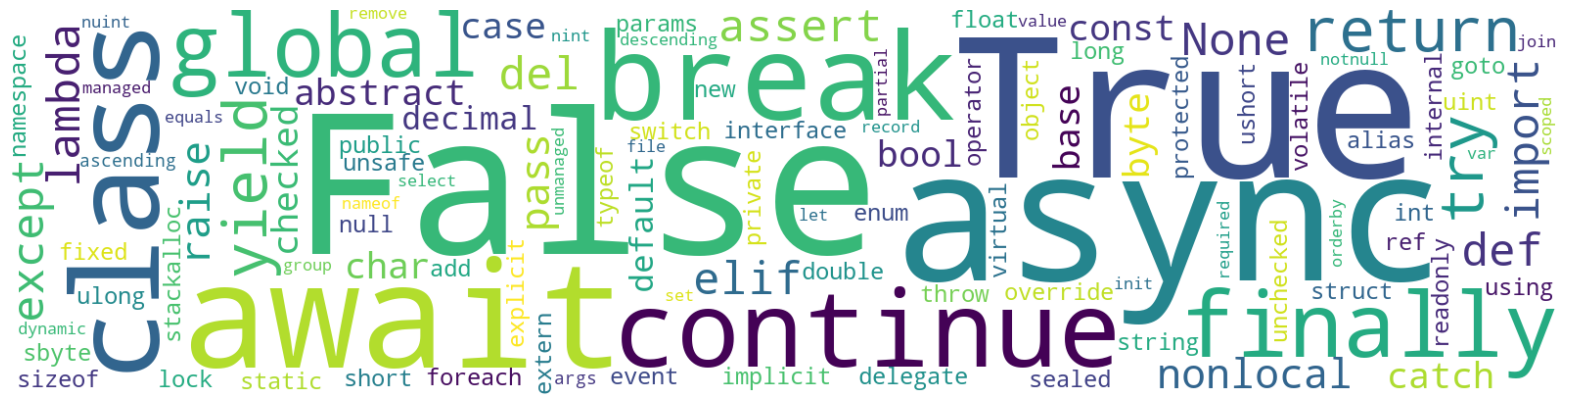

In [44]:
keywords = {}

# get the python keywords
keywords['python'] = keyword.kwlist

# list of c# keywords (as at: https://learn.microsoft.com/en-us/dotnet/csharp/language-reference/keywords/)
keywords['c#'] = [
    'abstract', 'as', 'base', 'bool', 'break', 'byte', 'case', 'catch', 'char', 'checked', 'class', 'const', 'continue', 'decimal', 'default', 'delegate', 'do', 'double', 'else', 'enum', 'event', 'explicit', 'extern', 'false', 'finally', 'fixed', 'float', 'for', 'foreach', 'goto', 'if', 'implicit', 'in', 'int', 'interface', 'internal', 'is', 'lock', 'long', 'namespace', 'new', 'null', 'object', 'operator', 'out', 'override', 'params', 'private', 'protected', 'public', 'readonly', 'ref', 'return', 'sbyte', 'sealed', 'short', 'sizeof', 'stackalloc', 'static', 'string', 'struct', 'switch', 'this', 'throw', 'true', 'try', 'typeof', 'uint', 'ulong', 'unchecked', 'unsafe', 'ushort', 'using', 'virtual', 'void', 'volatile', 'while', 'add', 'and', 'alias', 'ascending', 'args', 'async', 'await', 'by', 'descending', 'dynamic', 'equals', 'file', 'from', 'get', 'global', 'group', 'init', 'into', 'join', 'let', 'managed', 'nameof', 'nint', 'not', 'notnull', 'nuint', 'on', 'or', 'orderby', 'partial', 'record', 'remove', 'required', 'scoped', 'select', 'set', 'unmanaged', 'value', 'var', 'when', 'where', 'with', 'yield'
]

# list of t-sql keywords (as at: https://learn.microsoft.com/en-us/sql/t-sql/language-elements/reserved-keywords-transact-sql?view=sql-server-ver16)
keywords['t-sql'] = [
    'ADD', 'EXTERNAL', 'PROCEDURE', 'ALL', 'FETCH', 'PUBLIC', 'ALTER', 'FILE', 'RAISERROR', 'AND', 'FILLFACTOR', 'READ', 'ANY', 'FOR', 'READTEXT', 'AS', 'FOREIGN', 'RECONFIGURE', 'ASC', 'FREETEXT', 'REFERENCES', 'AUTHORIZATION', 'FREETEXTTABLE', 'REPLICATION', 'BACKUP', 'FROM', 'RESTORE', 'BEGIN', 'FULL', 'RESTRICT', 'BETWEEN', 'FUNCTION', 'RETURN', 'BREAK', 'GOTO', 'REVERT', 'BROWSE', 'GRANT', 'REVOKE', 'BULK', 'GROUP', 'RIGHT', 'BY', 'HAVING', 'ROLLBACK', 'CASCADE', 'HOLDLOCK', 'ROWCOUNT', 'CASE', 'IDENTITY', 'ROWGUIDCOL', 'CHECK', 'IDENTITY_INSERT', 'RULE', 'CHECKPOINT', 'IDENTITYCOL', 'SAVE', 'CLOSE', 'IF', 'SCHEMA', 'CLUSTERED', 'IN', 'SECURITYAUDIT', 'COALESCE', 'INDEX', 'SELECT', 'COLLATE', 'INNER', 'SEMANTICKEYPHRASETABLE', 'COLUMN', 'INSERT', 'SEMANTICSIMILARITYDETAILSTABLE', 'COMMIT', 'INTERSECT', 'SEMANTICSIMILARITYTABLE', 'COMPUTE', 'INTO', 'SESSION_USER', 'CONSTRAINT', 'IS', 'SET', 'CONTAINS', 'JOIN', 'SETUSER', 'CONTAINSTABLE', 'KEY', 'SHUTDOWN', 'CONTINUE', 'KILL', 'SOME', 'CONVERT', 'LEFT', 'STATISTICS', 'CREATE', 'LIKE', 'SYSTEM_USER', 'CROSS', 'LINENO', 'TABLE', 'CURRENT', 'LOAD', 'TABLESAMPLE', 'CURRENT_DATE', 'MERGE', 'TEXTSIZE', 'CURRENT_TIME', 'NATIONAL', 'THEN', 'CURRENT_TIMESTAMP', 'NOCHECK', 'TO', 'CURRENT_USER', 'NONCLUSTERED', 'TOP', 'CURSOR', 'NOT', 'TRAN', 'DATABASE', 'NULL', 'TRANSACTION', 'DBCC', 'NULLIF', 'TRIGGER', 'DEALLOCATE', 'OF', 'TRUNCATE', 'DECLARE', 'OFF', 'TRY_CONVERT', 'DEFAULT', 'OFFSETS', 'TSEQUAL', 'DELETE', 'ON', 'UNION', 'DENY', 'OPEN', 'UNIQUE', 'DESC', 'OPENDATASOURCE', 'UNPIVOT', 'DISK', 'OPENQUERY', 'UPDATE', 'DISTINCT', 'OPENROWSET', 'UPDATETEXT', 'DISTRIBUTED', 'OPENXML', 'USE', 'DOUBLE', 'OPTION', 'USER', 'DROP', 'OR', 'VALUES', 'DUMP', 'ORDER', 'VARYING', 'ELSE', 'OUTER', 'VIEW', 'END', 'OVER', 'WAITFOR', 'ERRLVL', 'PERCENT', 'WHEN', 'ESCAPE', 'PIVOT', 'WHERE', 'EXCEPT', 'PLAN', 'WHILE', 'EXEC', 'PRECISION', 'WITH', 'EXECUTE', 'PRIMARY', 'WITHIN GROUP', 'EXISTS', 'PRINT', 'WRITETEXT', 'EXIT', 'PROC', 'LABEL', 'ABSOLUTE', 'EXEC', 'OVERLAPS', 'ACTION', 'EXECUTE', 'PAD', 'ADA', 'EXISTS', 'PARTIAL', 'ADD', 'EXTERNAL', 'PASCAL', 'ALL', 'EXTRACT', 'POSITION', 'ALLOCATE', 'FALSE', 'PRECISION', 'ALTER', 'FETCH', 'PREPARE', 'AND', 'FIRST', 'PRESERVE', 'ANY', 'FLOAT', 'PRIMARY', 'ARE', 'FOR', 'PRIOR', 'AS', 'FOREIGN', 'PRIVILEGES', 'ASC', 'FORTRAN', 'PROCEDURE', 'ASSERTION', 'FOUND', 'PUBLIC', 'AT', 'FROM', 'READ', 'AUTHORIZATION', 'FULL', 'REAL', 'AVG', 'GET', 'REFERENCES', 'BEGIN', 'GLOBAL', 'RELATIVE', 'BETWEEN', 'GO', 'RESTRICT', 'BIT', 'GOTO', 'REVOKE', 'BIT_LENGTH', 'GRANT', 'RIGHT', 'BOTH', 'GROUP', 'ROLLBACK', 'BY', 'HAVING', 'ROWS', 'CASCADE', 'HOUR', 'SCHEMA', 'CASCADED', 'IDENTITY', 'SCROLL', 'CASE', 'IMMEDIATE', 'SECOND', 'CAST', 'IN', 'SECTION', 'CATALOG', 'INCLUDE', 'SELECT', 'CHAR', 'INDEX', 'SESSION', 'CHAR_LENGTH', 'INDICATOR', 'SESSION_USER', 'CHARACTER', 'INITIALLY', 'SET', 'CHARACTER_LENGTH', 'INNER', 'SIZE', 'CHECK', 'INPUT', 'SMALLINT', 'CLOSE', 'INSENSITIVE', 'SOME', 'COALESCE', 'INSERT', 'SPACE', 'COLLATE', 'INT', 'SQL', 'COLLATION', 'INTEGER', 'SQLCA', 'COLUMN', 'INTERSECT', 'SQLCODE', 'COMMIT', 'INTERVAL', 'SQLERROR', 'CONNECT', 'INTO', 'SQLSTATE', 'CONNECTION', 'IS', 'SQLWARNING', 'CONSTRAINT', 'ISOLATION', 'SUBSTRING', 'CONSTRAINTS', 'JOIN', 'SUM', 'CONTINUE', 'KEY', 'SYSTEM_USER', 'CONVERT', 'LANGUAGE', 'TABLE', 'CORRESPONDING', 'LAST', 'TEMPORARY', 'COUNT', 'LEADING', 'THEN', 'CREATE', 'LEFT', 'TIME', 'CROSS', 'LEVEL', 'TIMESTAMP', 'CURRENT', 'LIKE', 'TIMEZONE_HOUR', 'CURRENT_DATE', 'LOCAL', 'TIMEZONE_MINUTE', 'CURRENT_TIME', 'LOWER', 'TO', 'CURRENT_TIMESTAMP', 'MATCH', 'TRAILING', 'CURRENT_USER', 'MAX', 'TRANSACTION', 'CURSOR', 'MIN', 'TRANSLATE', 'DATE', 'MINUTE', 'TRANSLATION', 'DAY', 'MODULE', 'TRIM', 'DEALLOCATE', 'MONTH', 'TRUE', 'DEC', 'NAMES', 'UNION', 'DECIMAL', 'NATIONAL', 'UNIQUE', 'DECLARE', 'NATURAL', 'UNKNOWN', 'DEFAULT', 'NCHAR', 'UPDATE', 'DEFERRABLE', 'NEXT', 'UPPER', 'DEFERRED', 'NO', 'USAGE', 'DELETE', 'NONE', 'USER', 'DESC', 'NOT', 'USING', 'DESCRIBE', 'NULL', 'VALUE', 'DESCRIPTOR', 'NULLIF', 'VALUES', 'DIAGNOSTICS', 'NUMERIC', 'VARCHAR', 'DISCONNECT', 'OCTET_LENGTH', 'VARYING', 'DISTINCT', 'OF', 'VIEW', 'DOMAIN', 'ON', 'WHEN', 'DOUBLE', 'ONLY', 'WHENEVER', 'DROP', 'OPEN', 'WHERE', 'ELSE', 'OPTION', 'WITH', 'END', 'OR', 'WORK', 'END-EXEC', 'ORDER', 'WRITE', 'ESCAPE', 'OUTER', 'YEAR', 'EXCEPT', 'OUTPUT', 'ZONE', 'EXCEPTION', 'ABSOLUTE', 'HOST', 'RELATIVE', 'ACTION', 'HOUR', 'RELEASE', 'ADMIN', 'IGNORE', 'RESULT', 'AFTER', 'IMMEDIATE', 'RETURNS', 'AGGREGATE', 'INDICATOR', 'ROLE', 'ALIAS', 'INITIALIZE', 'ROLLUP', 'ALLOCATE', 'INITIALLY', 'ROUTINE', 'ARE', 'INOUT', 'ROW', 'ARRAY', 'INPUT', 'ROWS', 'ASENSITIVE', 'INT', 'SAVEPOINT', 'ASSERTION', 'INTEGER', 'SCROLL', 'ASYMMETRIC', 'INTERSECTION', 'SCOPE', 'AT', 'INTERVAL', 'SEARCH', 'ATOMIC', 'ISOLATION', 'SECOND', 'BEFORE', 'ITERATE', 'SECTION', 'BINARY', 'LANGUAGE', 'SENSITIVE', 'BIT', 'LARGE', 'SEQUENCE', 'BLOB', 'LAST', 'SESSION', 'BOOLEAN', 'LATERAL', 'SETS', 'BOTH', 'LEADING', 'SIMILAR', 'BREADTH', 'LESS', 'SIZE', 'CALL', 'LEVEL', 'SMALLINT', 'CALLED', 'LIKE_REGEX', 'SPACE', 'CARDINALITY', 'LIMIT', 'SPECIFIC', 'CASCADED', 'LN', 'SPECIFICTYPE', 'CAST', 'LOCAL', 'SQL', 'CATALOG', 'LOCALTIME', 'SQLEXCEPTION', 'CHAR', 'LOCALTIMESTAMP', 'SQLSTATE', 'CHARACTER', 'LOCATOR', 'SQLWARNING', 'CLASS', 'MAP', 'START', 'CLOB', 'MATCH', 'STATE', 'COLLATION', 'MEMBER', 'STATEMENT', 'COLLECT', 'METHOD', 'STATIC', 'COMPLETION', 'MINUTE', 'STDDEV_POP', 'CONDITION', 'MOD', 'STDDEV_SAMP', 'CONNECT', 'MODIFIES', 'STRUCTURE', 'CONNECTION', 'MODIFY', 'SUBMULTISET', 'CONSTRAINTS', 'MODULE', 'SUBSTRING_REGEX', 'CONSTRUCTOR', 'MONTH', 'SYMMETRIC', 'CORR', 'MULTISET', 'SYSTEM', 'CORRESPONDING', 'NAMES', 'TEMPORARY', 'COVAR_POP', 'NATURAL', 'TERMINATE', 'COVAR_SAMP', 'NCHAR', 'THAN', 'CUBE', 'NCLOB', 'TIME', 'CUME_DIST', 'NEW', 'TIMESTAMP', 'CURRENT_CATALOG', 'NEXT', 'TIMEZONE_HOUR', 'CURRENT_DEFAULT_TRANSFORM_GROUP', 'NO', 'TIMEZONE_MINUTE', 'CURRENT_PATH', 'NONE', 'TRAILING', 'CURRENT_ROLE', 'NORMALIZE', 'TRANSLATE_REGEX', 'CURRENT_SCHEMA', 'NUMERIC', 'TRANSLATION', 'CURRENT_TRANSFORM_GROUP_FOR_TYPE', 'OBJECT', 'TREAT', 'CYCLE', 'OCCURRENCES_REGEX', 'TRUE', 'DATA', 'OLD', 'UESCAPE', 'DATE', 'ONLY', 'UNDER', 'DAY', 'OPERATION', 'UNKNOWN', 'DEC', 'ORDINALITY', 'UNNEST', 'DECIMAL', 'OUT', 'USAGE', 'DEFERRABLE', 'OVERLAY', 'USING', 'DEFERRED', 'OUTPUT', 'VALUE', 'DEPTH', 'PAD', 'VAR_POP', 'DEREF', 'PARAMETER', 'VAR_SAMP', 'DESCRIBE', 'PARAMETERS', 'VARCHAR', 'DESCRIPTOR', 'PARTIAL', 'VARIABLE', 'DESTROY', 'PARTITION', 'WHENEVER', 'DESTRUCTOR', 'PATH', 'WIDTH_BUCKET', 'DETERMINISTIC', 'POSTFIX', 'WITHOUT', 'DICTIONARY', 'PREFIX', 'WINDOW', 'DIAGNOSTICS', 'PREORDER', 'WITHIN', 'DISCONNECT', 'PREPARE', 'WORK', 'DOMAIN', 'PERCENT_RANK', 'WRITE', 'DYNAMIC', 'PERCENTILE_CONT', 'XMLAGG', 'EACH', 'PERCENTILE_DISC', 'XMLATTRIBUTES', 'ELEMENT', 'POSITION_REGEX', 'XMLBINARY', 'END-EXEC', 'PRESERVE', 'XMLCAST', 'EQUALS', 'PRIOR', 'XMLCOMMENT', 'EVERY', 'PRIVILEGES', 'XMLCONCAT', 'EXCEPTION', 'RANGE', 'XMLDOCUMENT', 'FALSE', 'READS', 'XMLELEMENT', 'FILTER', 'REAL', 'XMLEXISTS', 'FIRST', 'RECURSIVE', 'XMLFOREST', 'FLOAT', 'REF', 'XMLITERATE', 'FOUND', 'REFERENCING', 'XMLNAMESPACES', 'FREE', 'REGR_AVGX', 'XMLPARSE', 'FULLTEXTTABLE', 'REGR_AVGY', 'XMLPI', 'FUSION', 'REGR_COUNT', 'XMLQUERY', 'GENERAL', 'REGR_INTERCEPT', 'XMLSERIALIZE', 'GET', 'REGR_R2', 'XMLTABLE', 'GLOBAL', 'REGR_SLOPE', 'XMLTEXT', 'GO', 'REGR_SXX', 'XMLVALIDATE', 'GROUPING', 'REGR_SXY', 'YEAR', 'HOLD', 'REGR_SYY', 'ZONE'
]

# get the full text (or add a condition to the comprehensive list, i.e.:  if k in ['python', 'c#'])
txt = ' '.join([v for k in keywords for v in keywords[k]])

# Create and generate a word cloud image (1584x396 is the LinkedIn profile background recommended size):
wordcloud = WordCloud(width=1584, height=396, background_color='white').generate(txt)

# Display the generated image:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()